In [423]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


In [424]:
data = pd.read_json('data_export.json')
print(data.head())

                      apple  apricot   bacon   basil  blackberry  blueberry  \
Altbier              0.7037   0.5938  0.3448  0.3077      0.5714     0.5000   
Amber Kellerbier     0.4000   0.4815  0.2368  0.2941      0.4286     0.6087   
American Amber Ale   0.5313   0.5455  0.4103  0.2727      0.6667     0.5250   
American Barleywine  0.4857   0.6364  0.4103  0.2778      0.7500     0.5714   
American Brown Ale   0.6190   0.6061  0.4000  0.4000      0.5000     0.4286   

                     bourbon  cardamom    chai  chamomile  ...    port  \
Altbier               0.6286    0.2857  0.4839     0.4865  ...  0.3333   
Amber Kellerbier      0.5000    0.3448  0.5833     0.4000  ...  0.5833   
American Amber Ale    0.6512    0.4419  0.7059     0.4872  ...  0.6364   
American Barleywine   0.6552    0.4643  0.5161     0.4074  ...  0.6667   
American Brown Ale    0.7000    0.4815  0.5333     0.5200  ...  0.8889   

                     pumpkin  raspberry  red wine  rose hips     rye   smoke  \


In [425]:

flavors = list(data.columns)
avg_flavor_rating = (list(data.mean()))
flavor_stdev = (list(data.std()))
zippedList =  list(zip(flavors, avg_flavor_rating, flavor_stdev))
new_df = pd.DataFrame(zippedList, columns = ['Flavors', 'Average Rating', 'STDev Rating'])
print(new_df.head())

      Flavors  Average Rating  STDev Rating
0       apple        0.480396      0.099379
1     apricot        0.540247      0.112581
2       bacon        0.380108      0.093559
3       basil        0.385725      0.135283
4  blackberry        0.596599      0.102808


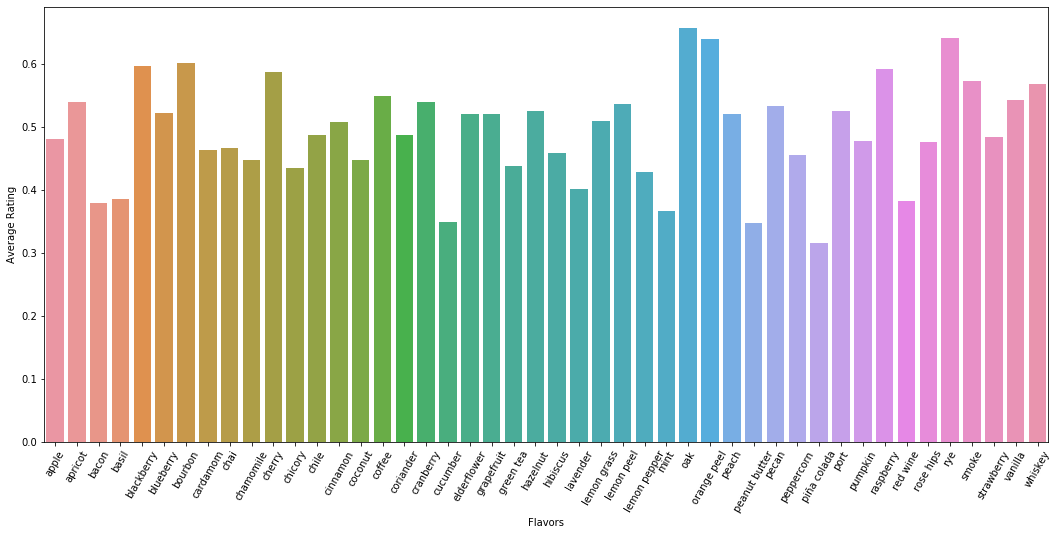

In [426]:
plt.figure(figsize = (18, 8))

ax = sns.barplot(x = new_df['Flavors'], y = new_df['Average Rating'])
# ax = sns.barplot(x = new_df['Flavors'], y = new_df['Average Rating'], yerr = new_df['STDev Rating'], ci = 'sd')
# ^^ alternate with stdev bars
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
plt.show()


In [427]:
fruits = ['apple', 'apricot', 'blackberry', 'blueberry', 'cherry', 'coconut', 'cranberry', 'cucumber', 'grapefruit', 
         'lemon peel', 'orange peel', 'peach', 'pumpkin', 'raspberry', 'strawberry']
florals = ['chamomile', 'elderflower', 'hibiscus', 'lavender', 'rose hips']
herbs = ['basil', 'chicory', 'lemon grass', 'mint']
spices = ['cardamom', 'chai', 'chile', 'cinnamon', 'coriander', 'lemon pepper', 'peppercorn', 'vanilla']
alcohols = ['bourbon', 'piña colada', 'port', 'red wine', 'whiskey']
nuts = ['hazelnut', 'pecan']
other = ['bacon', 'coffee', 'green tea', 'oak', 'peanut butter', 'rye', 'smoke']


In [428]:
grouping = []
for each in flavors:
    if each in fruits:
        grouping.append('fruit')
    elif each in spices:
        grouping.append('spice')
    elif each in other:
        grouping.append('other')
    elif each in florals:
        grouping.append('floral')
    elif each in alcohols:
        grouping.append('alcohol')
    elif each in herbs:
        grouping.append('herb')
    elif each in nuts:
        grouping.append('nut')
    else:
        grouping.append('Na')

In [429]:
#grouping = np.array(grouping)
new_df['Grouping'] = grouping


In [430]:
new_df = new_df.sort_values(['Grouping', 'Average Rating'])


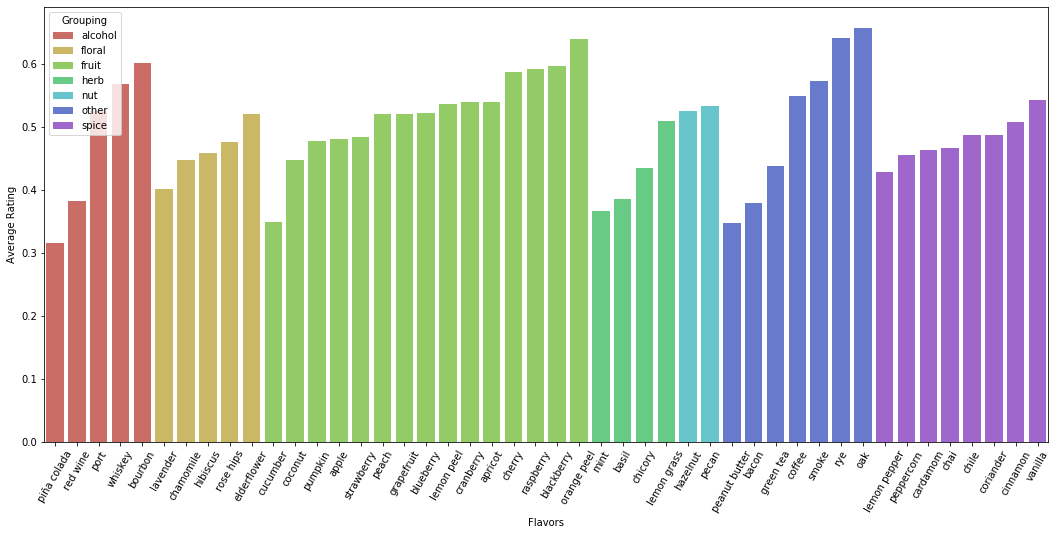

In [431]:
plt.figure(figsize = (18, 8))
pal = sns.color_palette('hls', 8)
ax = sns.barplot(x = new_df['Flavors'], y = new_df['Average Rating'], palette = pal, hue = new_df['Grouping'], dodge = False)

#ax = sns.barplot(x = new_df['Flavors'], y = new_df['Average Rating'], hue = new_df['Grouping'],
#yerr = new_df['STDev Rating'], dodge = False, ci = 'sd')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
plt.show()

In [432]:
def make_similarity_matrix(df, variables):
    
    similarity_vec_overall = []
    used = []
    for var1 in variables:
        similarity_vec_part = []
        for var2 in variables:
            if var2 in used:
                similarity_vec_part.append(np.nan)
            else:
                euclid = np.linalg.norm(np.subtract(df[var1].values.reshape(-1, 1), df[var2].values.reshape(-1, 1)))
                similarity_vec_part.append(euclid)
        
        similarity_vec_overall.append(similarity_vec_part)
        used.append(var1)
    return  similarity_vec_overall


In [433]:
sim = make_similarity_matrix(data, flavors)
print(sim[0:5])


[[0.0, 1.34217791294597, 1.7926093216314591, 1.7590601240435189, 1.7081106433717927, 1.1349142698900214, 2.08813212465112, 1.3256275532742974, 1.4210442005792785, 1.1530326014471577, 1.5716662241073962, 1.5407489477523584, 2.1956371854202144, 1.6697931728211133, 1.6260371059726775, 2.090290867319666, 1.2883663027260532, 1.267786902440627, 1.9036754345213367, 1.2428439403239653, 1.3931979507593313, 1.3633399172620158, 1.7693086785521628, 1.3417126257138674, 1.6140329643473827, 1.3313029707771256, 1.3294469489227467, 1.3455994240486282, 1.7514387228789936, 2.324366853575399, 2.0091471747983025, 1.314762488056303, 2.1817213754281273, 1.7446084689694705, 1.3789453723770206, 2.1433886698403537, 2.3557532977797147, 1.853687306424684, 1.589754106772491, 2.194591365152064, 1.1117313029684825, 2.2578155017627104, 2.1024979048741046, 1.2616503636110918, 2.1032845242619937, 2.0159596746959005], [nan, 0.0, 2.2394396598256447, 2.035618488322407, 1.3709545506689855, 1.1327601202372901, 1.90231535766

In [434]:
from sklearn.preprocessing import minmax_scale

sim = minmax_scale(sim)


In [435]:
similarity_df = pd.DataFrame(sim)
similarity_df = similarity_df.transpose()

similarity_df.columns = flavors



In [436]:
from_flavor = []
to_flavor = []
for flavor1 in flavors:
    for flavor2 in flavors:
        from_flavor.append(flavor1)
        to_flavor.append(flavor2)

sim_vals = sim.flatten()


sim_df = pd.DataFrame(zip(from_flavor, to_flavor, sim_vals), columns = ['From', "To", 'Similarity'])

sim_df = sim_df.dropna()
sim_df = sim_df[(sim_df != 0).all(1)]


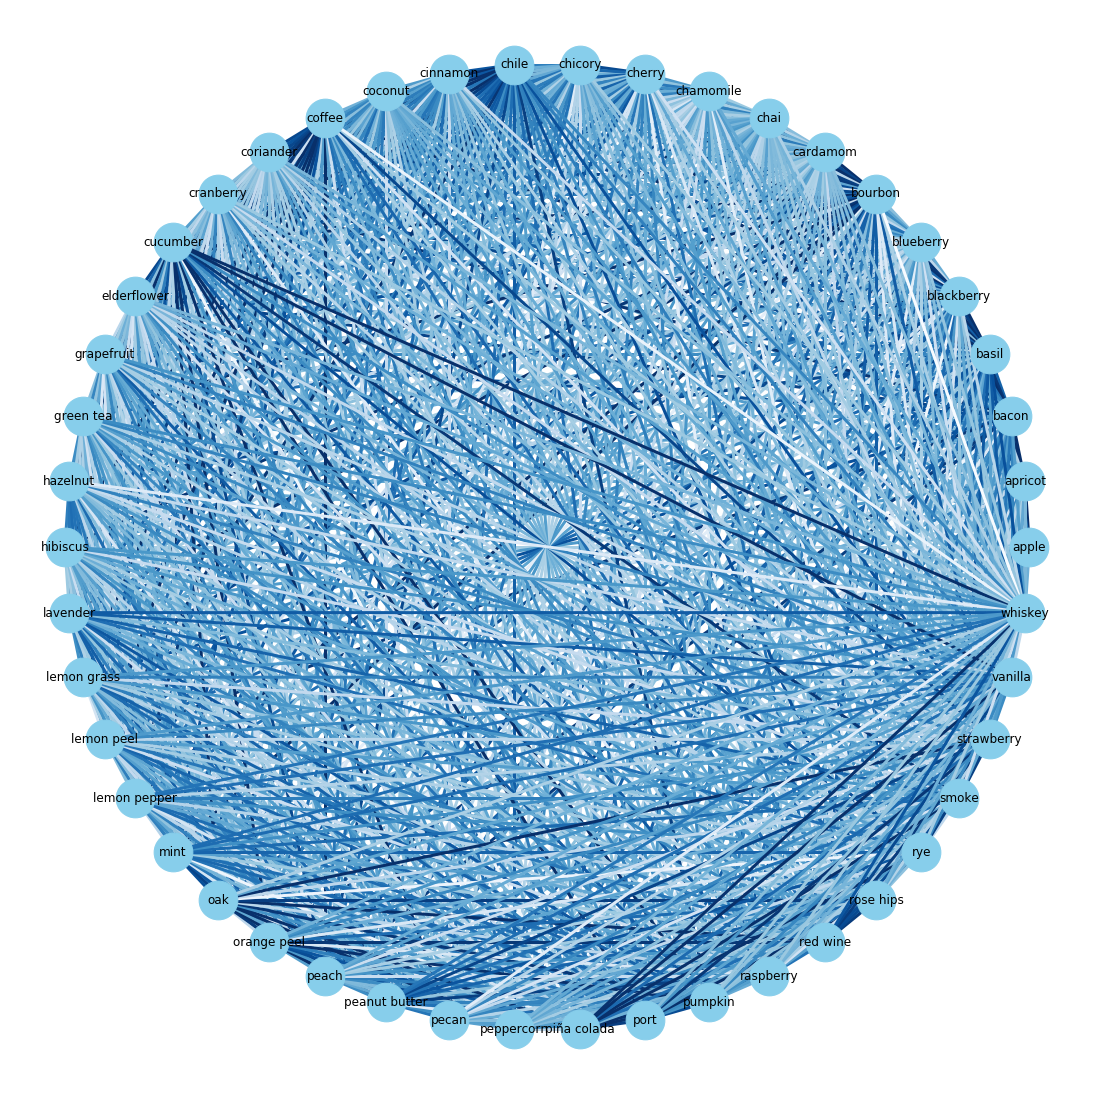

In [437]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

 
# Build your graph
G=nx.from_pandas_edgelist(sim_df, 'From', 'To', create_using=nx.Graph())
pos = nx.circular_layout(G)

# Custom the nodes:
plt.figure(1,figsize=(15,15)) 
nx.draw(G, pos = pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color=sim_df['Similarity'],
        width=3.0, edge_cmap=plt.cm.Blues)
